In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
# Getting a dataset
train_data = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=ToTensor(), target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data", train=False, download=True, transform=ToTensor()
)

100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [3]:
# First training sample
image, label = train_data[0]
image.shape

torch.Size([1, 28, 28])

In [4]:
# How many samples are there? 
print(f"""---- TRAIN DATA ----
Length of features: {len(train_data.data)} \nLength of target: {len(train_data.targets)}
---- TEST DATA ----
Length of features: {len(test_data.data)} \nLength of target: {len(test_data.targets)}""") 

---- TRAIN DATA ----
Length of features: 60000 
Length of target: 60000
---- TEST DATA ----
Length of features: 10000 
Length of target: 10000


In [6]:
# Classes name
class_name = train_data.classes 
class_name # There are 10 different classes, it means our problem is multi-class classification.

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

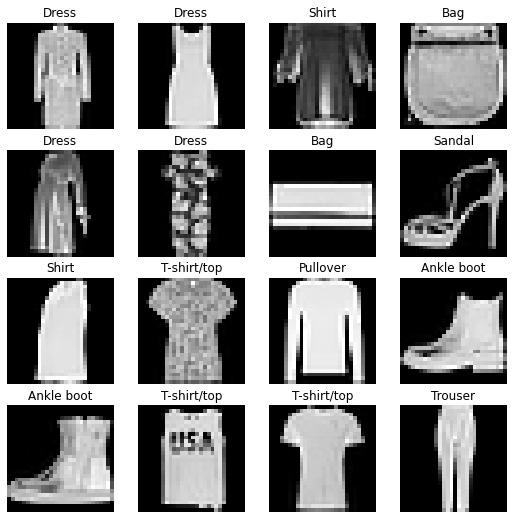

In [15]:
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range (1,rows*cols+1):
    rnd_idx = torch.randint(0, len(train_data), size=[1]).item()
    img,label = train_data[rnd_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_name[label])
    plt.axis(False)

In [16]:
from torch.utils.data import DataLoader
# DataLoader: Combines a dataset and a sampler, and provides an iterable over the given dataset
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False)

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001F3CF78F910>, <torch.utils.data.dataloader.DataLoader object at 0x000001F3CF548A00>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [18]:
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [19]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))

In [20]:
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))